In [19]:
import numpy as np                 
import matplotlib.pyplot as plt
import quantities as pq
import random

# Create trials with spike trains

In [47]:
from neo.core import SpikeTrain

# generate trials
trials = [SpikeTrain(np.arange(0, 10, 2)*pq.s, t_stop=10*pq.s, orient=315. * pq.deg),
          SpikeTrain(np.arange(0, 10, 0.5)*pq.s, t_stop=10*pq.s, orient=np.pi/3 * pq.rad),
          SpikeTrain(np.arange(0, 10, 1)*pq.s, t_stop=10*pq.s, orient=0 * pq.deg),
          SpikeTrain(np.arange(0, 10, 0.3)*pq.s, t_stop=10*pq.s, orient=np.pi/3 * pq.rad),
          SpikeTrain(np.arange(0, 10, 0.3)*pq.s, t_stop=10*pq.s, orient=2*np.pi/3 * pq.rad)
         ]

trials = []
t_stop = 10*pq.s
orients = np.arange(0, 345, 45)*pq.deg

for i in range(3):
    for orient in orients:
        spikes = random.sample(list(np.arange(0, t_stop.magnitude, 0.1)), np.random.randint(10))*pq.s
        trial = SpikeTrain(np.sort(spikes), t_stop=t_stop, orient=orient)
        trials.append(trial)
    
# print trials
for i, trial in enumerate(trials):
    print("Trial {}, orient {}: {}".format(i, 
                                           trial.annotations["orient"].rescale(pq.deg), 
                                           trial))

Trial 0, orient 0.0: [0.7 4.9 7.1 8.5 9.6] s
Trial 1, orient 45.0: [0.7 1.  2.4 5.  5.2 6.  8.3 8.4] s
Trial 2, orient 90.0: [0.4 0.6 1.6 5.6 6.6 7.  7.1 8.1 9.9] s
Trial 3, orient 135.0: [1.  1.1 4.  6.  7.5 8.2] s
Trial 4, orient 180.0: [0.  1.4 2.2 2.8 6.8 7.5 8.3 8.7] s
Trial 5, orient 225.0: [2.6 6.9] s
Trial 6, orient 270.0: [7.  7.9 9. ] s
Trial 7, orient 315.0: [] s
Trial 8, orient 0.0: [0.  1.6 1.8 7.6 8.1 8.3 8.7 8.8 9.1] s
Trial 9, orient 45.0: [3.7 5.3 5.8 9. ] s
Trial 10, orient 90.0: [2.8 5.2] s
Trial 11, orient 135.0: [0.9 2.  2.5 9.4] s
Trial 12, orient 180.0: [0.1 1.9 4.5 5.2 5.4 6.4 8.4] s
Trial 13, orient 225.0: [1.6 5. ] s
Trial 14, orient 270.0: [2.3] s
Trial 15, orient 315.0: [3.9 5.7] s
Trial 16, orient 0.0: [] s
Trial 17, orient 45.0: [0.1 1.3 2.3] s
Trial 18, orient 90.0: [1.4 4.  4.1] s
Trial 19, orient 135.0: [2.1 8. ] s
Trial 20, orient 180.0: [1.  2.7] s
Trial 21, orient 225.0: [1.6 2.2 4.8 8.5] s
Trial 22, orient 270.0: [0.1 0.5 3.1 3.2 3.7 4.8 7.5 8.2 9.1

# Plot raster plot for each orientation

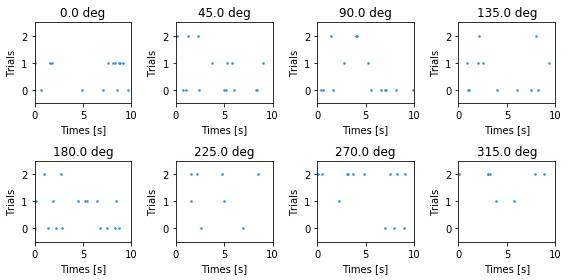

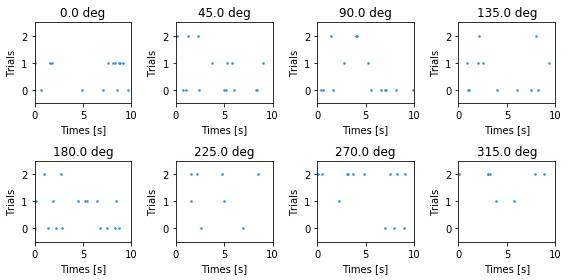

In [48]:
from visualstimulation.plot import orient_raster_plots
orient_raster_plots(trials)

# Compute and plot orientation tuning

In [49]:
from visualstimulation.analysis import make_orientation_trials, compute_orientation_tuning

# Group trials based on orientation
orient_trials = make_orientation_trials(trials)
for orient, t in orient_trials.items():
    print("Orient: {},\ntrials: {}\n".format(orient, t))

# Compute tuing
rates, orients = compute_orientation_tuning(orient_trials)

Orient: 0.0 deg,
trials: [<SpikeTrain(array([0.7, 4.9, 7.1, 8.5, 9.6]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([0. , 1.6, 1.8, 7.6, 8.1, 8.3, 8.7, 8.8, 9.1]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([], dtype=float64) * s, [0.0 s, 10.0 s])>]

Orient: 45.0 deg,
trials: [<SpikeTrain(array([0.7, 1. , 2.4, 5. , 5.2, 6. , 8.3, 8.4]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([3.7, 5.3, 5.8, 9. ]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([0.1, 1.3, 2.3]) * s, [0.0 s, 10.0 s])>]

Orient: 90.0 deg,
trials: [<SpikeTrain(array([0.4, 0.6, 1.6, 5.6, 6.6, 7. , 7.1, 8.1, 9.9]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([2.8, 5.2]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([1.4, 4. , 4.1]) * s, [0.0 s, 10.0 s])>]

Orient: 135.0 deg,
trials: [<SpikeTrain(array([1. , 1.1, 4. , 6. , 7.5, 8.2]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([0.9, 2. , 2.5, 9.4]) * s, [0.0 s, 10.0 s])>, <SpikeTrain(array([2.1, 8. ]) * s, [0.0 s, 10.0 s])>]

Orient: 180.0 deg,
trials: [<SpikeTrain(array([0. , 1.4, 2.2, 2.8, 6

Text(0.5, 0, 'Rate')

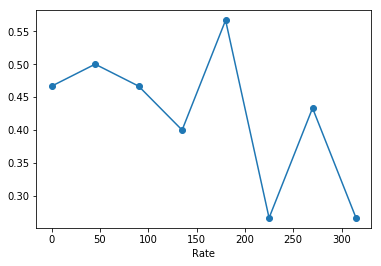

In [50]:
plt.plot(orients, rates, '-o')
plt.xlabel("Orientation")
plt.xlabel("Rate")

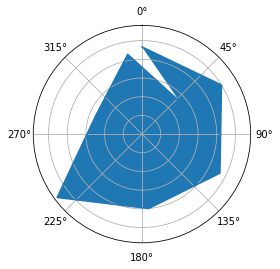

In [51]:
from visualstimulation.plot import polar_tuning_curve
polar_tuning_curve(orients=orients, rates=rates)

# Compute tuning metrics

In [52]:
from visualstimulation.analysis import compute_osi, compute_dsi, compute_circular_variance

osi = compute_osi(orients=orients, rates=rates)
dsi = compute_dsi(orients=orients, rates=rates)
circ_var = compute_circular_variance(orients=orients, rates=rates)

print("OSI", osi)
print("DSI", dsi)
print("Circular variance", circ_var)

OSI 0.1333333333333333 dimensionless
DSI 0.09677419354838714 dimensionless
Circular variance 0.9504950495049505 dimensionless
